In [2]:
# import necessary libraries:
import numpy as np 
# importing keras models:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense 
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# change the working directory
os.chdir("/Users/karimaidrissi/Desktop/DSSA 5104 DL/keras/")

In [18]:
# load the dataset
features_and_targets = np.loadtxt('features_and_targets.csv',delimiter=',')
# shuffle our dataset by using np.random
np.random.shuffle(features_and_targets)

# columns 0-4 are features
X = features_and_targets[:,0:5]
# columns 5-6 are targets
Y = features_and_targets[:,5:7]

# the random output will remain the same by using seed 10
np.random.seed(10)

# Create a simple model 
model = tf.keras.models.Sequential() # intial model with Sequential model type
model.add(tf.keras.layers.Dense(4,input_dim=5,activation="relu")) # fully connect the 4 hidden layer and 5 input layers by using Dense layer 
model.add(tf.keras.layers.Dense(3, activation="relu")) # using ReLu function to fire the model
model.add(tf.keras.layers.Dense(2, activation="sigmoid")) # using Sigmoid function to activate the last two output layers
# done with the archeticture of our model we will define some paramters for training our model
# we will compile our model with loss function, optimizer as adam default and do the accuracy. 
model.compile(loss='mean_squared_error',optimizer="adam", metrics= ["accuracy"])



In [19]:
# train the model by passing X and Y with 150 iteration
model.fit(X,Y, epochs=150,verbose=0)

#run and create a history object with model.fit()
history = model.fit(X,Y, epochs=150, verbose=0 )
print(history.history.keys())

# evaluate the model
val_loss, val_accuracy = model.evaluate(X,Y)
print(val_loss, val_accuracy)
# printing the accuracy of our model
print('\n%s: %.2f%%' % ( model.metrics_names[1],val_accuracy*100))
# printing the loss of our model
print('\n%s: %.2f%%' % (model.metrics_names[0], val_loss*100))

# returning the predicting model
predicted_targets = model.predict(X)
predicted_targets

# iterate by 22 times over the predicted target and the observed target
for i in range(22):
    print('Predicted: ',predicted_targets[i,:],'Observed: ',Y[i,:])

dict_keys(['loss', 'accuracy'])
22/22 [==============================] - 0s 12ms/sample - loss: 0.2130 - accuracy: 0.6364
0.21304577589035034 0.6363636

accuracy: 63.64%

loss: 21.30%
Predicted:  [0.44608557 0.6543813 ] Observed:  [1. 0.]
Predicted:  [0.436274  0.5885499] Observed:  [0. 1.]
Predicted:  [0.3161513  0.68494016] Observed:  [0. 1.]
Predicted:  [0.3723901  0.51726073] Observed:  [0. 1.]
Predicted:  [0.36497337 0.5129326 ] Observed:  [0. 1.]
Predicted:  [0.4271265 0.5481677] Observed:  [1. 0.]
Predicted:  [0.29423326 0.7019329 ] Observed:  [0. 1.]
Predicted:  [0.4214809  0.60004795] Observed:  [1. 0.]
Predicted:  [0.3841725  0.52406037] Observed:  [0. 1.]
Predicted:  [0.32450667 0.6696159 ] Observed:  [0. 1.]
Predicted:  [0.42578447 0.5474286 ] Observed:  [1. 0.]
Predicted:  [0.42790473 0.55164415] Observed:  [1. 0.]
Predicted:  [0.4271265 0.5481677] Observed:  [0. 1.]
Predicted:  [0.44002816 0.6047595 ] Observed:  [0. 1.]
Predicted:  [0.4137374  0.66538984] Observed:  [0. 1

dict_keys(['loss', 'accuracy'])
Accuracy [0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0.6363636, 0

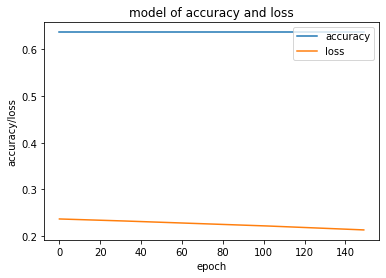

In [20]:
# list all data in history:
type(history.history)
print(history.history.keys()) 
# summarize history for accuracy:
print('Accuracy', history.history["accuracy"]) # print history for accuracy
print('Loss',history.history["loss"])  # print history for loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model of accuracy and loss")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()


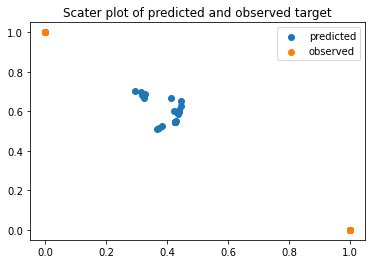

In [21]:
# plotting scastter plot of predicted target and observed target
plt.scatter(predicted_targets[:,0],predicted_targets[:,1])
plt.scatter(Y[:,0],Y[:,1])
plt.title("Scater plot of predicted and observed target")
plt.legend(["predicted","observed"])
plt.show()

In [22]:
# Run this command to see if Tensorflow has detected a GPU to use
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

#Run this - if Theano finds a GPU to use it will tell you
#import theano

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 725552351135439036
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3332633806451044665
physical_device_desc: "device: XLA_CPU device"
]


# epochs = 500

In [23]:
######################################
# train the model by passing X and Y with 500 iteration
model.fit(X,Y, epochs=500,verbose=0)

#run and create a history object with model.fit()
history = model.fit(X,Y, epochs=500, verbose=0 )
print(history.history.keys())

# evaluate the model
val_loss, val_accuracy = model.evaluate(X,Y)
print(val_loss, val_accuracy)
# printing the accuracy of our model
print('\n%s: %.2f%%' % ( model.metrics_names[1],val_accuracy*100))
# printing the loss of our model
print('\n%s: %.2f%%' % (model.metrics_names[0], val_loss*100))

# returning the predicting model
predicted_targets = model.predict(X)
predicted_targets

# iterate by 22 times over the predicted target and the observed target
for i in range(22):
    print('Predicted: ',predicted_targets[i,:],'Observed: ',Y[i,:])

dict_keys(['loss', 'accuracy'])
22/22 [==============================] - 0s 75us/sample - loss: 0.0400 - accuracy: 1.0000
0.0399923212826252 1.0

accuracy: 100.00%

loss: 4.00%
Predicted:  [0.69049716 0.3352232 ] Observed:  [1. 0.]
Predicted:  [0.04834585 0.9074958 ] Observed:  [0. 1.]
Predicted:  [0.02381992 0.9817238 ] Observed:  [0. 1.]
Predicted:  [0.04701096 0.9079255 ] Observed:  [0. 1.]
Predicted:  [0.04089212 0.9095444 ] Observed:  [0. 1.]
Predicted:  [0.69049716 0.3352232 ] Observed:  [1. 0.]
Predicted:  [0.02380996 0.98165154] Observed:  [0. 1.]
Predicted:  [0.69049716 0.3352232 ] Observed:  [1. 0.]
Predicted:  [0.04158007 0.9097821 ] Observed:  [0. 1.]
Predicted:  [0.01986909 0.98129076] Observed:  [0. 1.]
Predicted:  [0.69049716 0.3352232 ] Observed:  [1. 0.]
Predicted:  [0.69049716 0.3352232 ] Observed:  [1. 0.]
Predicted:  [0.06442876 0.90294194] Observed:  [0. 1.]
Predicted:  [0.07667875 0.9000406 ] Observed:  [0. 1.]
Predicted:  [0.0279302  0.97974086] Observed:  [0. 1.

dict_keys(['loss', 'accuracy'])
Accuracy [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

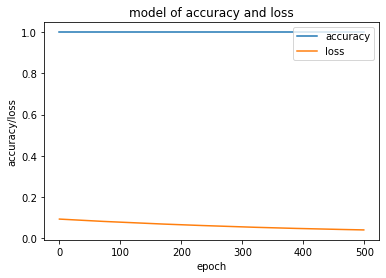

In [24]:
# list all data in history:
type(history.history)
print(history.history.keys()) 
# summarize history for accuracy:
print('Accuracy', history.history["accuracy"]) # print history for accuracy
print('Loss',history.history["loss"])  # print history for loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model of accuracy and loss")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

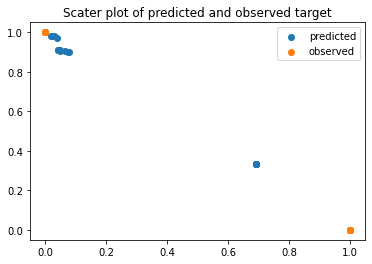

In [25]:
# plotting scastter plot of predicted target and observed target
plt.scatter(predicted_targets[:,0],predicted_targets[:,1])
plt.scatter(Y[:,0],Y[:,1])
plt.title("Scater plot of predicted and observed target")
plt.legend(["predicted","observed"])
plt.show()

In [26]:
# Run this command to see if Tensorflow has detected a GPU to use
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

#Run this - if Theano finds a GPU to use it will tell you
#import theano

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5365360192848153725
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11553298888453344940
physical_device_desc: "device: XLA_CPU device"
]


# epchos= 1500

In [27]:
######################################
# train the model by passing X and Y with 1500 iteration
model.fit(X,Y, epochs=1500,verbose=0)

#run and create a history object with model.fit()
history = model.fit(X,Y, epochs=1500, verbose=0 )
print(history.history.keys())

# evaluate the model
val_loss, val_accuracy = model.evaluate(X,Y)
print(val_loss, val_accuracy)
# printing the accuracy of our model
print('\n%s: %.2f%%' % ( model.metrics_names[1],val_accuracy*100))
# printing the loss of our model
print('\n%s: %.2f%%' % (model.metrics_names[0], val_loss*100))

# returning the predicting model
predicted_targets = model.predict(X)
predicted_targets

# iterate by 22 times over the predicted target and the observed target
for i in range(22):
    print('Predicted: ',predicted_targets[i,:],'Observed: ',Y[i,:])

dict_keys(['loss', 'accuracy'])
22/22 [==============================] - 0s 76us/sample - loss: 0.0030 - accuracy: 1.0000
0.0030249471310526133 1.0

accuracy: 100.00%

loss: 0.30%
Predicted:  [0.91253215 0.09362251] Observed:  [1. 0.]
Predicted:  [0.00459823 0.9912143 ] Observed:  [0. 1.]
Predicted:  [0.00686691 0.9945799 ] Observed:  [0. 1.]
Predicted:  [0.00470164 0.9911451 ] Observed:  [0. 1.]
Predicted:  [0.00560265 0.99028945] Observed:  [0. 1.]
Predicted:  [0.91253215 0.09362251] Observed:  [1. 0.]
Predicted:  [0.00673747 0.9946069 ] Observed:  [0. 1.]
Predicted:  [0.91253215 0.09362251] Observed:  [1. 0.]
Predicted:  [0.00546172 0.9904022 ] Observed:  [0. 1.]
Predicted:  [0.00540533 0.9948873 ] Observed:  [0. 1.]
Predicted:  [0.91253215 0.09362251] Observed:  [1. 0.]
Predicted:  [0.91253215 0.09362251] Observed:  [1. 0.]
Predicted:  [0.01143452 0.9843258 ] Observed:  [0. 1.]
Predicted:  [0.00786737 0.9878006 ] Observed:  [0. 1.]
Predicted:  [0.00767107 0.9943975 ] Observed:  [0.

dict_keys(['loss', 'accuracy'])
Accuracy [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

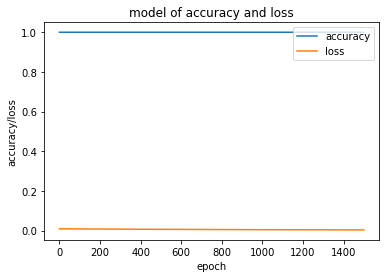

In [28]:
# list all data in history:
type(history.history)
print(history.history.keys()) 
# summarize history for accuracy:
print('Accuracy', history.history["accuracy"]) # print history for accuracy
print('Loss',history.history["loss"])  # print history for loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model of accuracy and loss")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

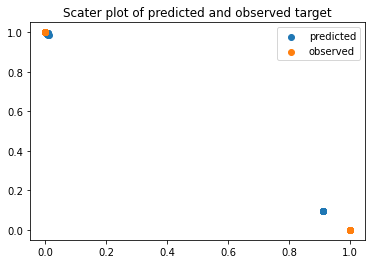

In [29]:
# plotting scastter plot of predicted target and observed target
plt.scatter(predicted_targets[:,0],predicted_targets[:,1])
plt.scatter(Y[:,0],Y[:,1])
plt.title("Scater plot of predicted and observed target")
plt.legend(["predicted","observed"])
plt.show()

In [30]:
# Run this command to see if Tensorflow has detected a GPU to use
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

#Run this - if Theano finds a GPU to use it will tell you
#import theano

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17494523589789408744
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16852421481777283151
physical_device_desc: "device: XLA_CPU device"
]
